In [1]:
%matplotlib ipympl
import numpy as np
from numpy import cos, sin, pi, exp 
import matplotlib.pyplot as plt
from matplotlib import cm
import mpl_toolkits.mplot3d.axes3d as plot3d
plt.style.use('_mpl-gallery-nogrid')
from matplotlib.animation import FuncAnimation

This cell contains all the required imports.

# Gradient Descent for single variable functions

In [2]:
def grad_desc_1(f, df, s, a):
    x = s
    xall, yall = [], []
    for i in range(50000):
        x = x - df(x) * a 
        y = f(x)
        xall.append(x)
        yall.append(y)
    return x, f(x)


This function takes the Function definition (one variable) - f, Derivative (also a function definition) - df, Starting point - s, Learning rate - a as parameters and performs the gradient descent with 50000 iterations and returns the value of x at which the value of f(x) is minimum and the value of f(x)

In [3]:
def f1(x):
    return x ** 2 + 3 * x + 8
def df1(x):
    return 2 * x + 3

This cell contains the definition of a function f1 and its derivative df1.

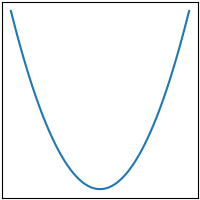

In [4]:
xbase = np.linspace(-6, 3, 100)
ybase = f1(xbase)
plt.plot(xbase, ybase)

plot of the function f1

In [5]:
print(grad_desc_1(f1, df1, 0, 0.3))

(-1.5, 5.75)


Finding the minimum value of the function f1 by calling the function grad_desc_1. Here -1.5 is the value of x at which f1 has the minimum value  and 5.75 is the minimum value of f1

In [6]:
def f4(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1
def df4(x):
    return -1*sin(x)*(4*cos(x)**3+3*sin(x)*cos(x)+8*cos(x)+1)

This cell contains the definition of a trignometric function f4 and its derivative df4.

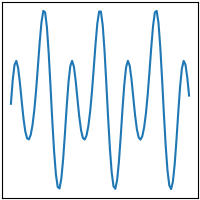

In [7]:
xbase_ = np.linspace(-10, 10, 100)
ybase_ = f4(xbase_)
plt.close()
plt.plot(xbase_, ybase_)
plt.show()

Plot of the function f4

In [8]:
print(grad_desc_1(f4, df4, 1, 0.01))

(1.6616608120437881, -4.045412051572552)


Finding the minimum value of the function f4 by calling the function grad_desc_1. Here 1.6616608120437881 is the value of x at which f4 has the minimum value  and -4.045412051572552 is the minimum value of df4

# Gradient Descent for multi-variable Functions

In [9]:
def grad_desc(f, a,*args):
    n=len(args)
    x=[]
    df=[]

    for i in range(0,int(n/2)):
        x.append(float(args[i]))
    for i in range(int(n/2),n):
        df.append(args[i])
    temp=[0 for i in range(len(x))]
    
    for j in range(200000):
        for i in range(len(x)):
            temp[i]=x[i]
            temp[i] = temp[i] - df[i](*x) * a 
        for i in range(len(x)):
            x[i]=temp[i]
    return x, f(*x)

This cell contains the definition of the multi-variable gradient descent function grad_desc which the function f, learning rate a and the values of all the variables at the starting point and the definitions of the partial derivatives of the function with respect to each variable in the same order as the starting points. Here the first half of the *args is the starting points and the second half is the partial derivatives. The function performs the gradient descent and returns the list of values of all the variables at point where f is minimum and also the minimum value of f. 

In [10]:
def f2(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df2_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df2_dy(x, y):
    return 2*y - 4

This cell contains the definition of the 2-variable function f2 and its partial derivatives df2_dx, df2_dy.

In [11]:
print(grad_desc(f2, 0.01, 5, 5, df2_dx, df2_dy ))

([4.0079053031155505, 2.0000000000000107], 2.0000000039055976)


In this cell we find the minimum value of f2 i.e. 2.0000000039055976 and the values of x and y at that point i.e. 4.007905303115277, 2.0000000000000107

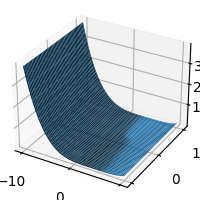

In [12]:
xbase1 = np.linspace(-10, 10, 100)
ybase1 = np.linspace(-10, 10, 100)
xmesh1, ymesh1 = np.meshgrid(xbase1, ybase1)
zmesh1 = f2(xmesh1, ymesh1)
bestx1, besty1 = -5,-1
 
lr1 = 0.001

fig1 = plt.figure()
# ax1 = fig1.add_subplot(111, projection='3d')
ax1 = plot3d.Axes3D(fig1, auto_add_to_figure=False)
fig1.add_axes(ax1)
ax1.plot_surface(xmesh1, ymesh1, zmesh1)

xall1, yall1, zall1 = [], [], []
lnall1,  = ax1.plot([], [], [], 'ro')
lngood1, = ax1.plot([], [], [], 'go',markersize=10)
xall1.append(bestx1)
yall1.append(besty1)
zall1.append(f2(bestx1, besty1))
def onestepderiv1(frame):
    global bestx1, besty1, lr1
    x = bestx1 - df2_dx(bestx1, besty1) * lr1
    y = besty1 - df2_dy(bestx1, besty1) * lr1
    bestx1, besty1 = x, y
    z = f2(x, y)
    lngood1.set_data([x], [y])
    lngood1.set_3d_properties([z])
    xall1.append(x)
    yall1.append(y)
    zall1.append(z)
    lnall1.set_data(xall1, yall1)
    lnall1.set_3d_properties(zall1)
    # return lngood1,

ani = FuncAnimation(fig1, onestepderiv1, frames=range(1000000), interval=100, repeat=False)
plt.show()

This cell gives the animation of the gradient descent for the function f2. We use np.meshgrid and Axes3D to plot the 3D graph here gradient descent takes place in the function openstepsderiv1 which is the update function for FuncAnimation.

In [13]:
def f3(x,y):
    return exp(-(x - y)**2)*sin(y)

def df3_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def df3_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)

This cell contains the definition of the 2-variable function f3 and its partial derivatives df3_dx, df3_dy.

In [14]:
print(grad_desc(f3, 0.01, -0.1, -0.1, df3_dx, df3_dy))

([-1.570796326794869, -1.5707963267948746], -1.0)


In this cell we find the minimum value of f3 i.e. -1.0 and the values of x and y at that point i.e. -1.570796326794869, -1.5707963267948746

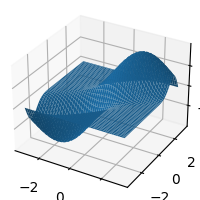

In [15]:
xbase2 = np.linspace(-pi, pi, 100)
ybase2 = np.linspace(-pi, pi, 100)
xmesh2, ymesh2 = np.meshgrid(xbase2, ybase2)
zmesh2 = f3(xmesh2, ymesh2)
bestx2, besty2 = -1,0
 
lr2 = 0.01

fig2 = plt.figure()
# ax2 = fig2.add_subplot(111, projection='3d')
ax2 = plot3d.Axes3D(fig2, auto_add_to_figure=False)
fig2.add_axes(ax2)
ax2.plot_surface(xmesh2, ymesh2, zmesh2)

xall2, yall2, zall2 = [], [], []
lnall2,  = ax2.plot([], [], [], 'ro')
lngood2, = ax2.plot([], [], [], 'go',markersize=10)

def onestepderiv2(frame):
    global bestx2, besty2, lr2
    x = bestx2 - df3_dx(bestx2, besty2) * lr2
    y = besty2 - df3_dy(bestx2, besty2) * lr2
    bestx2, besty2 = x, y
    z = f3(x, y)
    lngood2.set_data([x], [y])
    lngood2.set_3d_properties([z])
    xall2.append(x)
    yall2.append(y)
    zall2.append(z)
    lnall2.set_data(xall2, yall2)
    lnall2.set_3d_properties(zall2)
    # return lngood2,

ani = FuncAnimation(fig2, onestepderiv2, frames=range(200000), interval=100, repeat=False)
plt.show()

This cell gives the animation of the gradient descent for the function f3. We use np.meshgrid and Axes3D to plot the 3D graph here gradient descent takes place in the function openstepsderiv2 which is the update function for FuncAnimation.